1 Physical GPUs, 1 Logical GPUs
Found 3067 images belonging to 3 classes.
Found 1120 images belonging to 3 classes.
Epoch 1/175
100/100 [==============================] - 18s 167ms/step - loss: 1.0839 - acc: 0.3784 - val_loss: 0.9896 - val_acc: 0.4848
Epoch 2/175
100/100 [==============================] - 16s 163ms/step - loss: 0.9907 - acc: 0.4711 - val_loss: 0.8998 - val_acc: 0.5107
Epoch 3/175
100/100 [==============================] - 18s 180ms/step - loss: 0.9208 - acc: 0.5273 - val_loss: 0.8815 - val_acc: 0.5321
Epoch 4/175
100/100 [==============================] - 18s 181ms/step - loss: 0.8911 - acc: 0.5526 - val_loss: 1.0981 - val_acc: 0.4214
Epoch 5/175
100/100 [==============================] - 18s 176ms/step - loss: 0.8549 - acc: 0.5827 - val_loss: 1.1136 - val_acc: 0.4205
Epoch 6/175
100/100 [==============================] - 17s 168ms/step - loss: 0.8440 - acc: 0.5815 - val_loss: 1.1346 - val_acc: 0.4098
Epoch 7/175
100/100 [==============================] - 17s 168ms/ste

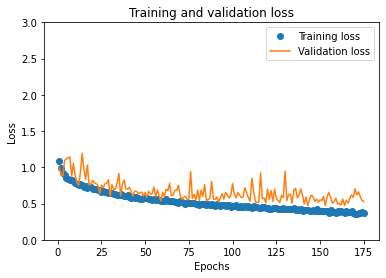

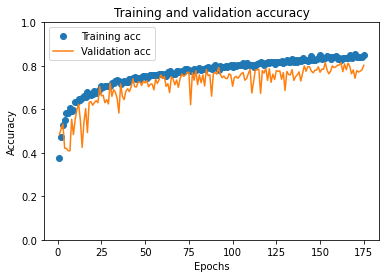

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,Flatten,Dense,MaxPooling2D,Dropout,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 2)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        
        print(e)

model=Sequential()
base_dir = 'cats_dogs_horses_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_dir,target_size = (150, 150),batch_size = 25,class_mode = 'categorical')
val_set=val_datagen.flow_from_directory(validation_dir,target_size = (150, 150),batch_size = 25,class_mode = 'categorical')





model.add(Convolution2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(256,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


history=model.fit_generator(training_set,steps_per_epoch=100,epochs=175,validation_data=val_set)
acc = history.history['acc']
val_acc =history.history['val_acc']
loss =history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'o', label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,3)
plt.legend()
plt.show()
plt.clf() 

plt.plot(epochs, acc, 'o', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend()
plt.show()